In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df = pd.read_csv("flight_price.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Finding Null Values

In [4]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

# Flight Price Comparision using plots

In [7]:
def price_comp_plot(source, destination , air_line , type_flight):
    p1 = df[(df.source_city == source) & (df.destination_city == destination)]
    air = p1[(p1.airline == air_line) & (p1.arrival_time == type_flight) ]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.scatter(air['days_left'], air['price'],marker='+',color='blue',label = air_line, s=50)
    plt.xlabel("Days left for journey")
    plt.ylabel("Price in INR")
    plt.title('Price_comp_plot')
    plt.legend()
    

    

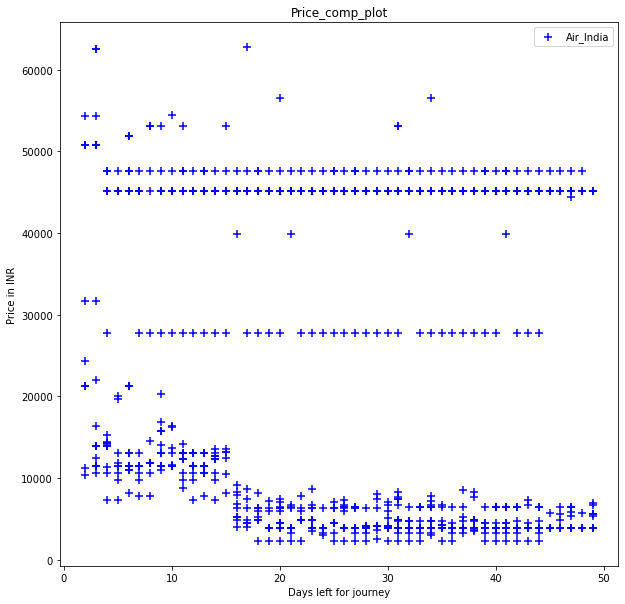

In [8]:
price_comp_plot('Chennai','Delhi','Air_India' , 'Night')

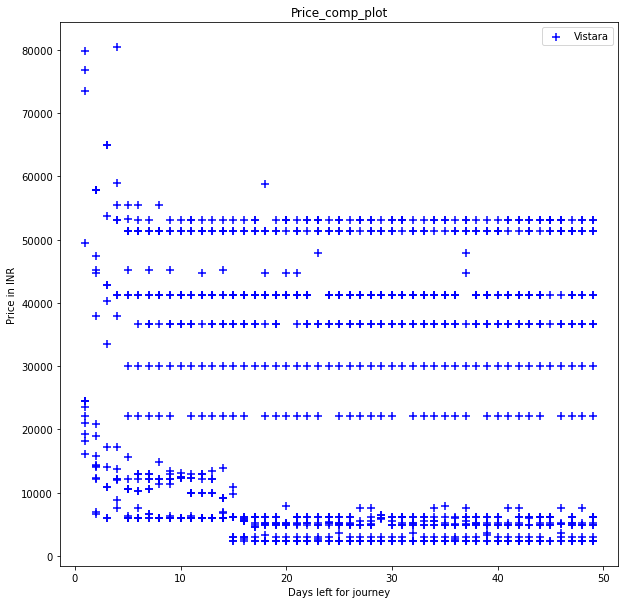

In [9]:
price_comp_plot('Mumbai','Delhi','Vistara' , 'Morning')

# Feature Engineering

In [10]:
df['Journey_cities'] = df['source_city'] + '-' + df['destination_city']

In [11]:
df.drop(['source_city' , 'destination_city'] , axis = 'columns')

,Unnamed: 0,airline,flight,departure_time,stops,arrival_time,class,duration,days_left,price,Journey_cities
0,0,SpiceJet,SG-8709,Evening,zero,Night,Economy,2.17,1,5953,Delhi-Mumbai
1,1,SpiceJet,SG-8157,Early_Morning,zero,Morning,Economy,2.33,1,5953,Delhi-Mumbai
2,2,AirAsia,I5-764,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,Delhi-Mumbai
3,3,Vistara,UK-995,Morning,zero,Afternoon,Economy,2.25,1,5955,Delhi-Mumbai
4,4,Vistara,UK-963,Morning,zero,Morning,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Morning,one,Evening,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,Vistara,UK-826,Afternoon,one,Night,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,Vistara,UK-832,Early_Morning,one,Night,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,Vistara,UK-828,Early_Morning,one,Evening,Business,10.00,49,81585,Chennai-Hyderabad


In [12]:
df1 = df.drop(['Unnamed: 0'] , axis = 'columns')

In [13]:
df1.columns = df1.columns.str.replace('class','Ticket_Class')

In [14]:
df2 = df1[((df1.Ticket_Class == 'Economy') &(df1.price<30000)) | (df1.Ticket_Class == 'Business')]
    



In [15]:
df2[df2.airline == 'AirAsia'].flight.unique()

array(['I5-764', 'I5-747', 'I5-744', 'I5-784', 'I5-721', 'I5-773',
       'I5-740', 'I5-482', 'I5-1529', 'I5-741', 'I5-788', 'I5-798',
       'I5-775', 'I5-881', 'I5-735', 'I5-548', 'I5-767', 'I5-792',
       'I5-783', 'I5-710', 'I5-711', 'I5-768', 'I5-779', 'I5-550',
       'I5-787', 'I5-791', 'I5-713', 'I5-559', 'I5-829', 'I5-737',
       'I5-942', 'I5-631', 'I5-620', 'I5-330', 'I5-1569', 'I5-471',
       'I5-678', 'I5-336', 'I5-941', 'I5-338', 'I5-423', 'I5-996',
       'I5-1566', 'I5-1528', 'I5-749', 'I5-1982', 'I5-1426', 'I5-2392',
       'I5-592', 'I5-992', 'I5-1229', 'I5-892', 'I5-589', 'I5-1621',
       'I5-819', 'I5-1782', 'I5-410', 'I5-1780', 'I5-2472', 'I5-972',
       'I5-5405', 'I5-5402', 'I5-1321', 'I5-722', 'I5-818', 'I5-1427',
       'I5-991', 'I5-1561', 'I5-820', 'I5-2461', 'I5-1451', 'I5-1783',
       'I5-1576', 'I5-1228', 'I5-1983', 'I5-1731', 'I5-1562', 'I5-339',
       'I5-1540', 'I5-1530', 'I5-334', 'I5-736', 'I5-1622', 'I5-1454',
       'I5-1564', 'I5-5204', 'I5-

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df3 = df2.drop('flight' , axis = 'columns')

In [18]:
df4 = df3.drop(['source_city' , 'arrival_time'] , axis = 'columns')

In [19]:
df5 = df4.drop(['destination_city'] , axis = 'columns')

In [20]:
df5

,airline,departure_time,stops,Ticket_Class,duration,days_left,price,Journey_cities
0,SpiceJet,Evening,zero,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Early_Morning,zero,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Early_Morning,zero,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,Morning,zero,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,Morning,zero,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...
300148,Vistara,Morning,one,Business,10.08,49,69265,Chennai-Hyderabad
300149,Vistara,Afternoon,one,Business,10.42,49,77105,Chennai-Hyderabad
300150,Vistara,Early_Morning,one,Business,13.83,49,79099,Chennai-Hyderabad
300151,Vistara,Early_Morning,one,Business,10.00,49,81585,Chennai-Hyderabad


In [21]:
def stops_con(x):
    if x == 'zero':
        return(0)
    elif x == 'one':
        return(1)
    elif x == 'two_or_more':
        return(2)
    

In [22]:
df5.stops = df5.stops.apply(stops_con)

In [23]:
df5

,airline,departure_time,stops,Ticket_Class,duration,days_left,price,Journey_cities
0,SpiceJet,Evening,0,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Early_Morning,0,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Early_Morning,0,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,Morning,0,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,Morning,0,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...
300148,Vistara,Morning,1,Business,10.08,49,69265,Chennai-Hyderabad
300149,Vistara,Afternoon,1,Business,10.42,49,77105,Chennai-Hyderabad
300150,Vistara,Early_Morning,1,Business,13.83,49,79099,Chennai-Hyderabad
300151,Vistara,Early_Morning,1,Business,10.00,49,81585,Chennai-Hyderabad


Text(0, 0.5, 'Count')

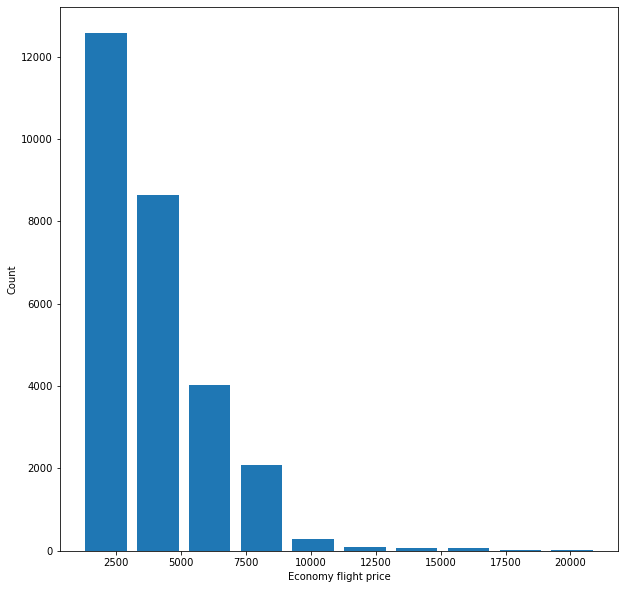

In [24]:
plt.hist(df5[(df5.Ticket_Class == 'Economy') & (df5.stops == 0)].price,rwidth=0.8)
plt.xlabel("Economy flight price")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

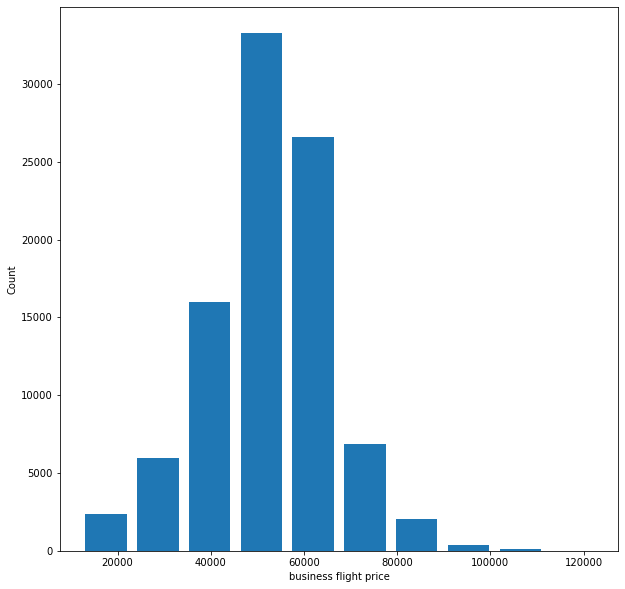

In [25]:
plt.hist(df5[df5.Ticket_Class == 'Business'].price,rwidth=0.8)
plt.xlabel("business flight price")
plt.ylabel("Count")

In [27]:
lab = LabelEncoder()


In [28]:
df5

,airline,departure_time,stops,Ticket_Class,duration,days_left,price,Journey_cities
0,SpiceJet,Evening,0,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Early_Morning,0,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Early_Morning,0,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,Morning,0,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,Morning,0,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...
300148,Vistara,Morning,1,Business,10.08,49,69265,Chennai-Hyderabad
300149,Vistara,Afternoon,1,Business,10.42,49,77105,Chennai-Hyderabad
300150,Vistara,Early_Morning,1,Business,13.83,49,79099,Chennai-Hyderabad
300151,Vistara,Early_Morning,1,Business,10.00,49,81585,Chennai-Hyderabad


# Using Label Encoding


In [29]:
df5['airline'] = lab.fit_transform(df5['airline'])
df5['departure_time'] = lab.fit_transform(df5['departure_time'])
df5['Ticket_Class'] = lab.fit_transform(df5['Ticket_Class'])
df5['Journey_cities'] = lab.fit_transform(df5['Journey_cities'])

In [30]:
df5

,airline,departure_time,stops,Ticket_Class,duration,days_left,price,Journey_cities
0,4,2,0,1,2.17,1,5953,14
1,4,1,0,1,2.33,1,5953,14
2,0,1,0,1,2.17,1,5956,14
3,5,4,0,1,2.25,1,5955,14
4,5,4,0,1,2.33,1,5955,14
...,...,...,...,...,...,...,...,...
300148,5,4,1,0,10.08,49,69265,7
300149,5,0,1,0,10.42,49,77105,7
300150,5,1,1,0,13.83,49,79099,7
300151,5,1,1,0,10.00,49,81585,7


In [31]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300072 entries, 0 to 300152
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   airline         300072 non-null  int32  
 1   departure_time  300072 non-null  int32  
 2   stops           300072 non-null  int64  
 3   Ticket_Class    300072 non-null  int32  
 4   duration        300072 non-null  float64
 5   days_left       300072 non-null  int64  
 6   price           300072 non-null  int64  
 7   Journey_cities  300072 non-null  int32  
dtypes: float64(1), int32(4), int64(3)
memory usage: 16.0 MB


In [32]:
x = df5.drop(['price'] , axis = 'columns')

In [33]:
y = df5['price']

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2 , random_state = 10)


In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
y.describe()

count    300072.000000
mean      20886.614842
std       22700.042649
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9064999453827618

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
knn.score(X_test, y_test)

0.33399983337498956

In [38]:
X_test

,airline,departure_time,stops,Ticket_Class,duration,days_left,Journey_cities
193791,5,5,1,1,19.42,49,9
93416,0,1,1,1,9.17,47,1
216108,1,5,1,0,10.67,6,13
201204,5,5,1,1,21.00,36,8
216800,1,1,0,0,2.17,16,13
...,...,...,...,...,...,...,...
171566,5,0,1,1,19.17,10,18
245151,5,5,1,0,10.92,6,1
53742,5,5,1,1,9.92,7,25
12604,4,1,0,1,2.50,15,10


In [39]:
p = lr.predict([[4,1,0,1,2.33,1,14]])

In [41]:
p

array([4468.96198905])

In [26]:
df6 = df5.copy()

In [27]:
df6

,airline,departure_time,stops,Ticket_Class,duration,days_left,price,Journey_cities
0,SpiceJet,Evening,0,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Early_Morning,0,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Early_Morning,0,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,Morning,0,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,Morning,0,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...
300148,Vistara,Morning,1,Business,10.08,49,69265,Chennai-Hyderabad
300149,Vistara,Afternoon,1,Business,10.42,49,77105,Chennai-Hyderabad
300150,Vistara,Early_Morning,1,Business,13.83,49,79099,Chennai-Hyderabad
300151,Vistara,Early_Morning,1,Business,10.00,49,81585,Chennai-Hyderabad


# Using One-Hot Encoding

In [28]:
dummies1 = pd.get_dummies(df6.airline)
dummies2 = pd.get_dummies(df6.departure_time)
dummies4 = pd.get_dummies(df6.Ticket_Class)
dummies7 = pd.get_dummies(df6.Journey_cities)

In [29]:
df7 = pd.concat([df6,dummies1,dummies2,dummies4,dummies7] , axis = 'columns')

In [30]:
df8 = df7.drop(['airline','departure_time','Ticket_Class','Journey_cities'],axis = 'columns')

In [31]:
df8

,stops,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,Kolkata-Bangalore,Kolkata-Chennai,Kolkata-Delhi,Kolkata-Hyderabad,Kolkata-Mumbai,Mumbai-Bangalore,Mumbai-Chennai,Mumbai-Delhi,Mumbai-Hyderabad,Mumbai-Kolkata
0,0,2.17,1,5953,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.33,1,5953,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.17,1,5956,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.25,1,5955,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2.33,1,5955,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,69265,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
300149,1,10.42,49,77105,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
300150,1,13.83,49,79099,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
300151,1,10.00,49,81585,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x = df8.drop(['price'],axis = 'columns')
y = df8['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2 , random_state = 10)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
lr.score(X_test, y_test)

0.9109483173333022